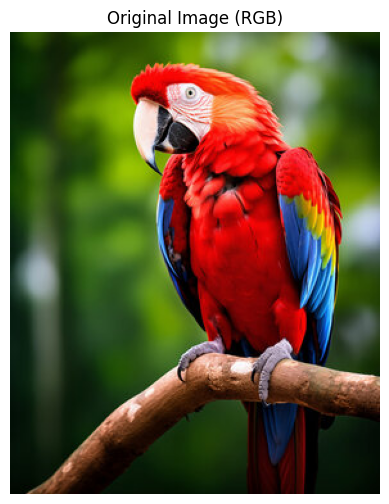

Image Dimensions: Height=360, Width=288, Channels=3
Total Pixels: 103680


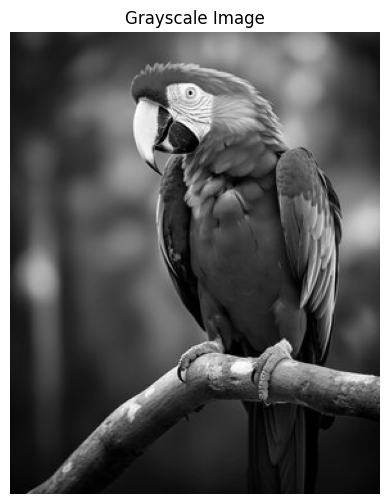

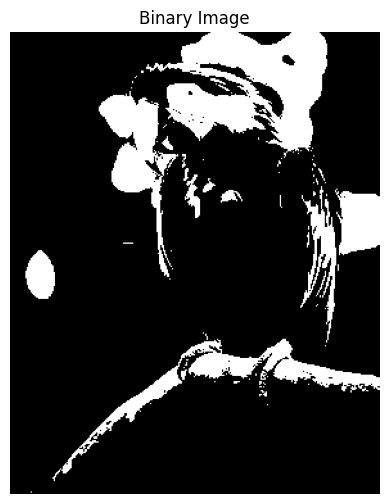

Black Pixel Area: 86425


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display images
def show_image(title, image, cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

# **Task 1: Image Understanding and Manipulation**
# 1. Read the image
image_bgr = cv2.imread('/content/Parrot.jpg')  # Replace with your image path
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 2. Display the image
show_image("Original Image (RGB)", image_rgb)

# 3. Extract image size
height, width, channels = image_rgb.shape
print(f"Image Dimensions: Height={height}, Width={width}, Channels={channels}")

# 4. Calculate total image pixels
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

# 5. Convert RGB to Grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
show_image("Grayscale Image", gray_image, cmap="gray")
cv2.imwrite("grayscale_image.jpg", gray_image)

# 6. Convert to Binary Image (Thresholding)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
show_image("Binary Image", binary_image, cmap="gray")
cv2.imwrite("binary_image.jpg", binary_image)

# Count black pixel area
black_pixel_area = np.sum(binary_image == 0)
print(f"Black Pixel Area: {black_pixel_area}")


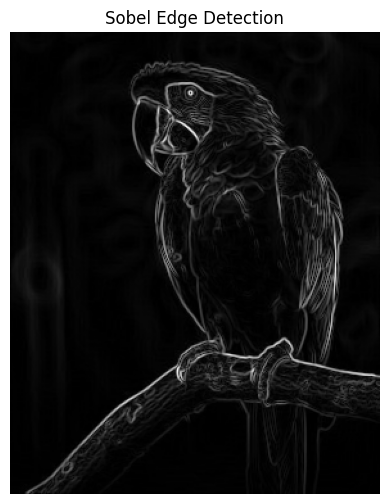

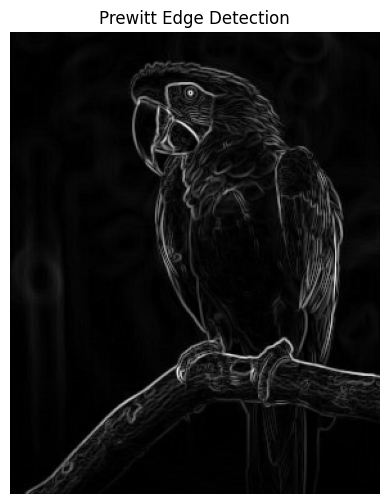

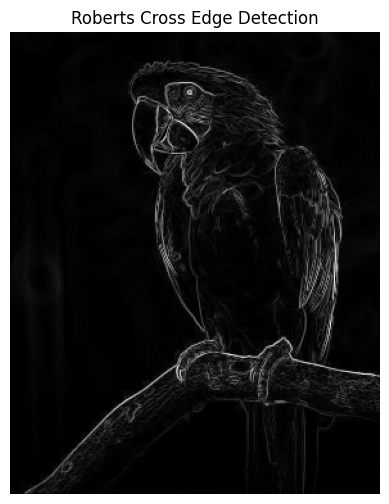

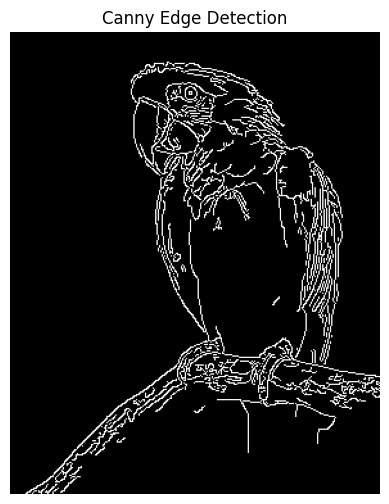

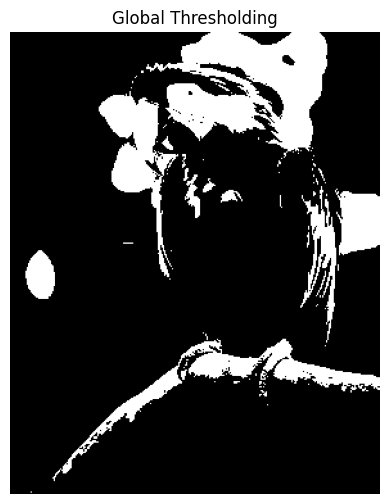

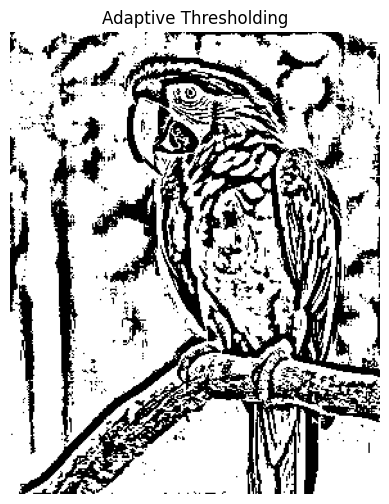

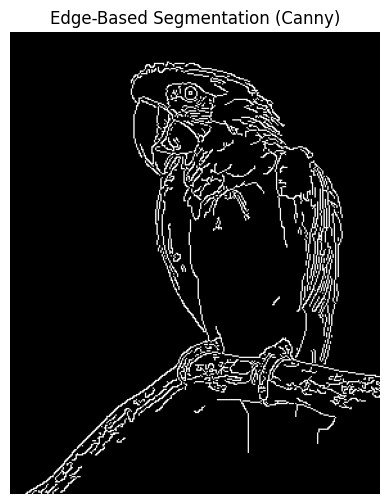

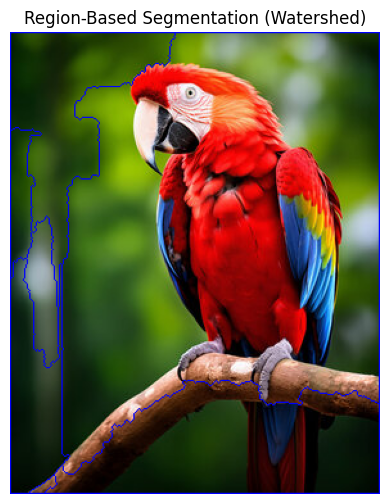

In [ ]:
from skimage import filters  # For Roberts and Prewitt operators

# **Task 2: Manipulate Image Properties**

# 1. Perform edge detection using different operators
# i. Sobel Operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)
show_image("Sobel Edge Detection", sobel_edge, cmap="gray")

# ii. Prewitt Operator
prewitt_x = filters.prewitt_v(gray_image)
prewitt_y = filters.prewitt_h(gray_image)
prewitt_edge = np.sqrt(prewitt_x**2 + prewitt_y**2)
show_image("Prewitt Edge Detection", prewitt_edge, cmap="gray")

# iii. Roberts Cross Operator
roberts_edge = filters.roberts(gray_image)
show_image("Roberts Cross Edge Detection", roberts_edge, cmap="gray")

# iv. Canny Edge Detector
canny_edge = cv2.Canny(gray_image, 100, 200)
show_image("Canny Edge Detection", canny_edge, cmap="gray")

# 2. Perform Image Segmentation
# i. Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
show_image("Global Thresholding", global_thresh, cmap="gray")

# ii. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)
show_image("Adaptive Thresholding", adaptive_thresh, cmap="gray")

# iii. Edge Detection for Segmentation (Canny)
show_image("Edge-Based Segmentation (Canny)", canny_edge, cmap="gray")

# iv. Region-Based Segmentation (Watershed Algorithm)
# Convert the original image to grayscale
gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply the Watershed algorithm
watershed_image = image_bgr.copy()
markers = cv2.watershed(watershed_image, markers)
watershed_image[markers == -1] = [255, 0, 0]
show_image("Region-Based Segmentation (Watershed)", cv2.cvtColor(watershed_image, cv2.COLOR_BGR2RGB))


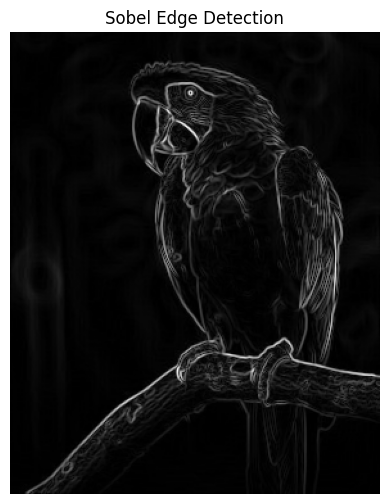

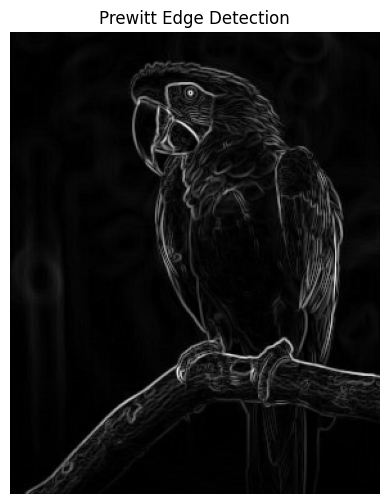

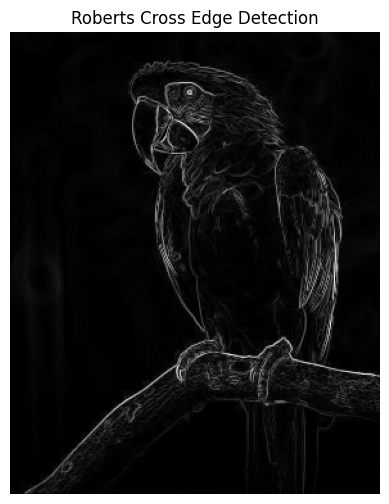

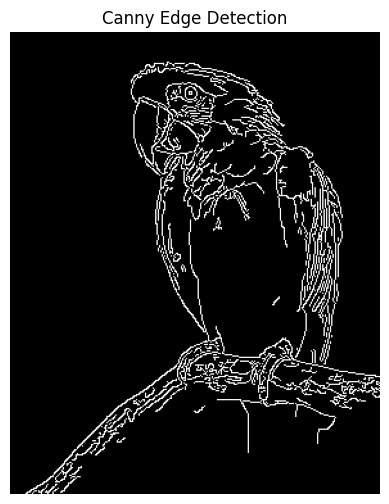

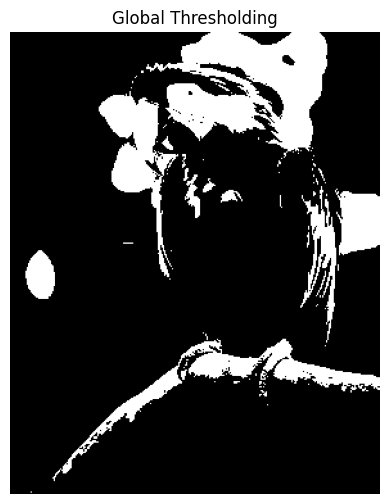

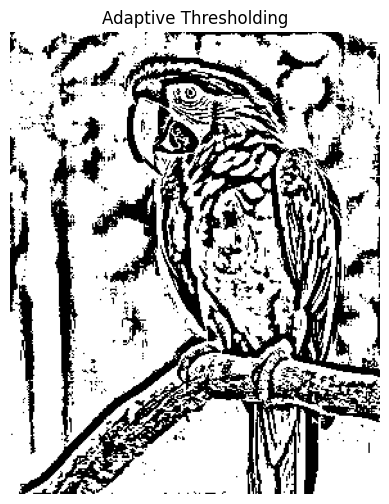

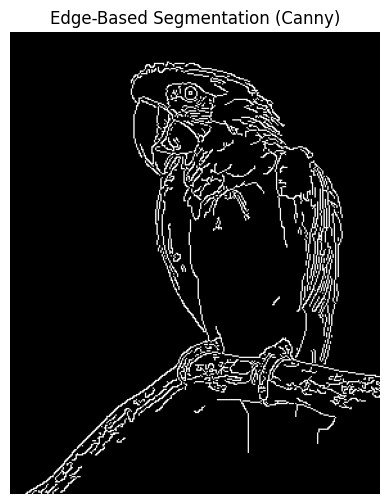

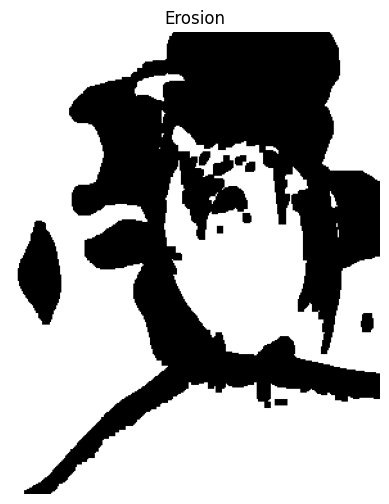

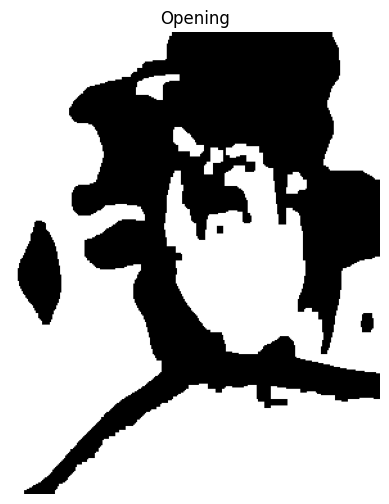

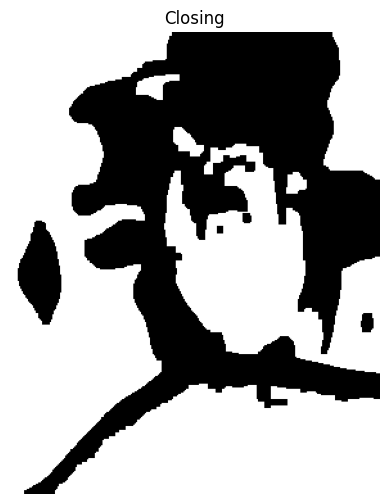

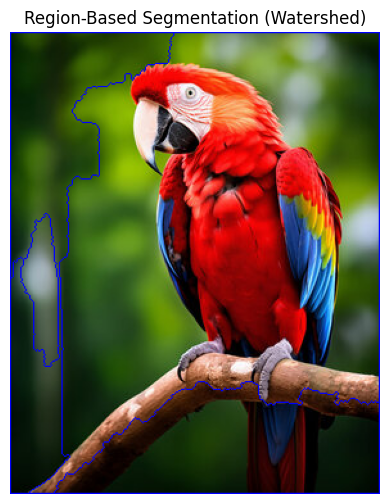

In [ ]:
from skimage import filters  # For Roberts and Prewitt operators

# **Task 2: Manipulate Image Properties**

# 1. Perform edge detection using different operators
# i. Sobel Operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)
show_image("Sobel Edge Detection", sobel_edge, cmap="gray")

# ii. Prewitt Operator
prewitt_x = filters.prewitt_v(gray_image)
prewitt_y = filters.prewitt_h(gray_image)
prewitt_edge = np.sqrt(prewitt_x**2 + prewitt_y**2)
show_image("Prewitt Edge Detection", prewitt_edge, cmap="gray")

# iii. Roberts Cross Operator
roberts_edge = filters.roberts(gray_image)
show_image("Roberts Cross Edge Detection", roberts_edge, cmap="gray")

# iv. Canny Edge Detector
canny_edge = cv2.Canny(gray_image, 100, 200)
show_image("Canny Edge Detection", canny_edge, cmap="gray")

# 2. Perform Image Segmentation
# i. Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
show_image("Global Thresholding", global_thresh, cmap="gray")

# ii. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)
show_image("Adaptive Thresholding", adaptive_thresh, cmap="gray")

# iii. Edge Detection for Segmentation (Canny)
show_image("Edge-Based Segmentation (Canny)", canny_edge, cmap="gray")
# Watershed Algorithm with Erosion, Opening, and Closing
_, binary = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Morphological operations
kernel = np.ones((3, 3), np.uint8)

# Erosion
eroded = cv2.erode(binary, kernel, iterations=2)
show_image("Erosion", eroded, cmap="gray")

# Opening (erosion followed by dilation)
opening = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel, iterations=2)
show_image("Opening", opening, cmap="gray")

# Closing (dilation followed by erosion)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)
show_image("Closing", closing, cmap="gray")

# Sure background area
sure_bg = cv2.dilate(closing, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Identifying unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply the Watershed algorithm
watershed_image = image_bgr.copy()
markers = cv2.watershed(watershed_image, markers)
watershed_image[markers == -1] = [255, 0, 0]
show_image("Region-Based Segmentation (Watershed)", cv2.cvtColor(watershed_image, cv2.COLOR_BGR2RGB))
